In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import default_rng
from scipy.optimize import curve_fit

22.635078340244092
[[0.05187435        nan]
 [       nan 0.1129127 ]]
32.59473365657979
[[0.03762603        nan]
 [       nan 0.0893546 ]]


C:\Users\hchr\AppData\Local\Temp\ipykernel_24968\944964847.py:21: RuntimeWarning: invalid value encountered in sqrt
  print(np.absolute(cv**0.5))


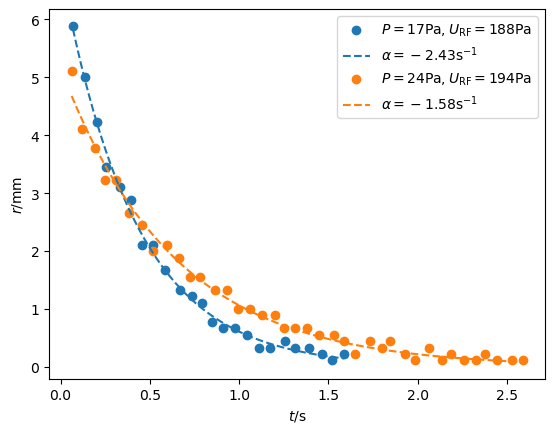

In [3]:
def exp(t, alpha, A):
    return A * np.exp(alpha*t)
R_c = 0.2
g = 9.80665

def plot(path, label, ax):
    dts = np.loadtxt(path + ".dts")
    data = np.loadtxt(path +".r")
    frames = data[:,0].astype(int)
    distance = data[:,1] / 9
    ts = np.cumsum(dts[frames])/1000

    ax.scatter(ts, distance, label = label)

    p0 = (-3, 50)
    (alpha, A), cv = curve_fit(exp, ts, distance, p0)
    ts_fit = np.linspace(np.min(ts), np.max(ts), 1000)
    ax.plot(ts_fit, exp(ts_fit, alpha, A), linestyle="--", label=f"$\\alpha={alpha:.3} \\mathrm{{s^{{-1}}}}$")
    print(-( g +  R_c * alpha**2) / (R_c * alpha))

    print(np.absolute(cv**0.5))


fig, ax = plt.subplots()
plot("data/Trajektorie/17Pa 188V", "$P = 17\\mathrm{Pa}, U_{\\mathrm{RF}} = 188\\mathrm{Pa}$",ax)
plot("data/Trajektorie/24Pa 194V","$P = 24\\mathrm{Pa}, U_{\\mathrm{RF}} = 194\\mathrm{Pa}$", ax)
ax.legend()
ax.set(xlabel="$t / \\mathrm{s}$", ylabel="$r / \\mathrm{mm}$")

fig.savefig("Einfall.png")




In [ ]:
R_c = 0.2
g = 9.80665
-( g +  R_c * alphas**2) / (R_c * alphas)

[-2.47306218 -1.2658934 ]


[Text(0.5, 0, '$x / \\mathrm{mm}$'), Text(0, 0.5, '$t / \\mathrm{s}$')]

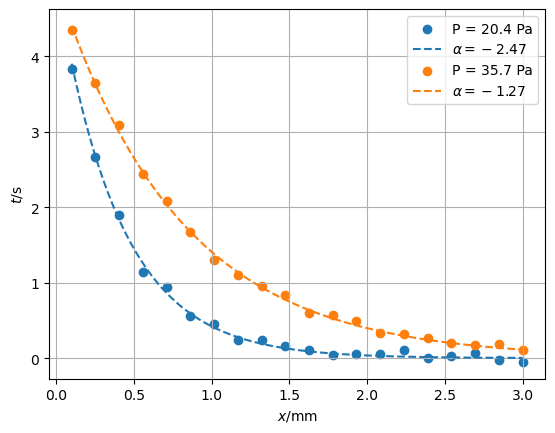

In [26]:
R_c = 0.2
g = 9.80665
gammas = np.array([22.3, 40])
alphas = (np.sqrt(gammas **2 * R_c **2 - 4*g*R_c) - gammas * R_c)/ (2*R_c)

labels = ["P = 20.4 Pa", "P = 35.7 Pa"]

print(alphas)
rng = default_rng()
A = 5
expo = lambda t, alpha : A * np.exp(alpha*t)
ts = np.linspace(0.1, 3, 100)

fig, ax = plt.subplots()
t_exp = np.linspace(0.1,3,20)

for i, alpha in enumerate(alphas):
    ax.scatter(t_exp, expo(t_exp, alpha) + rng.normal(loc=0.0, scale=0.05, size=len(t_exp)), label = labels[i])
    ax.plot(ts, expo(ts, alpha), label = f"$\\alpha = {alpha:.3}$", linestyle= "--")

ax.grid()
ax.legend()
ax.set(xlabel="$x / \\mathrm{mm}$", ylabel="$t / \\mathrm{s}$")


In [81]:
from PIL import Image, ImageOps
import glob
import os

from pathlib import Path

current_dir = Path('periodic').resolve()

out_dir = current_dir / "converted"
#os.mkdir(out_dir)
cnt = 0

for img in glob.glob(str(current_dir / "*.bmp")):
    filename = Path(img).stem
    im = Image.open(img)
    im = ImageOps.invert(im)
    im.save(str(out_dir / f'{filename}.png'))